In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [27]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


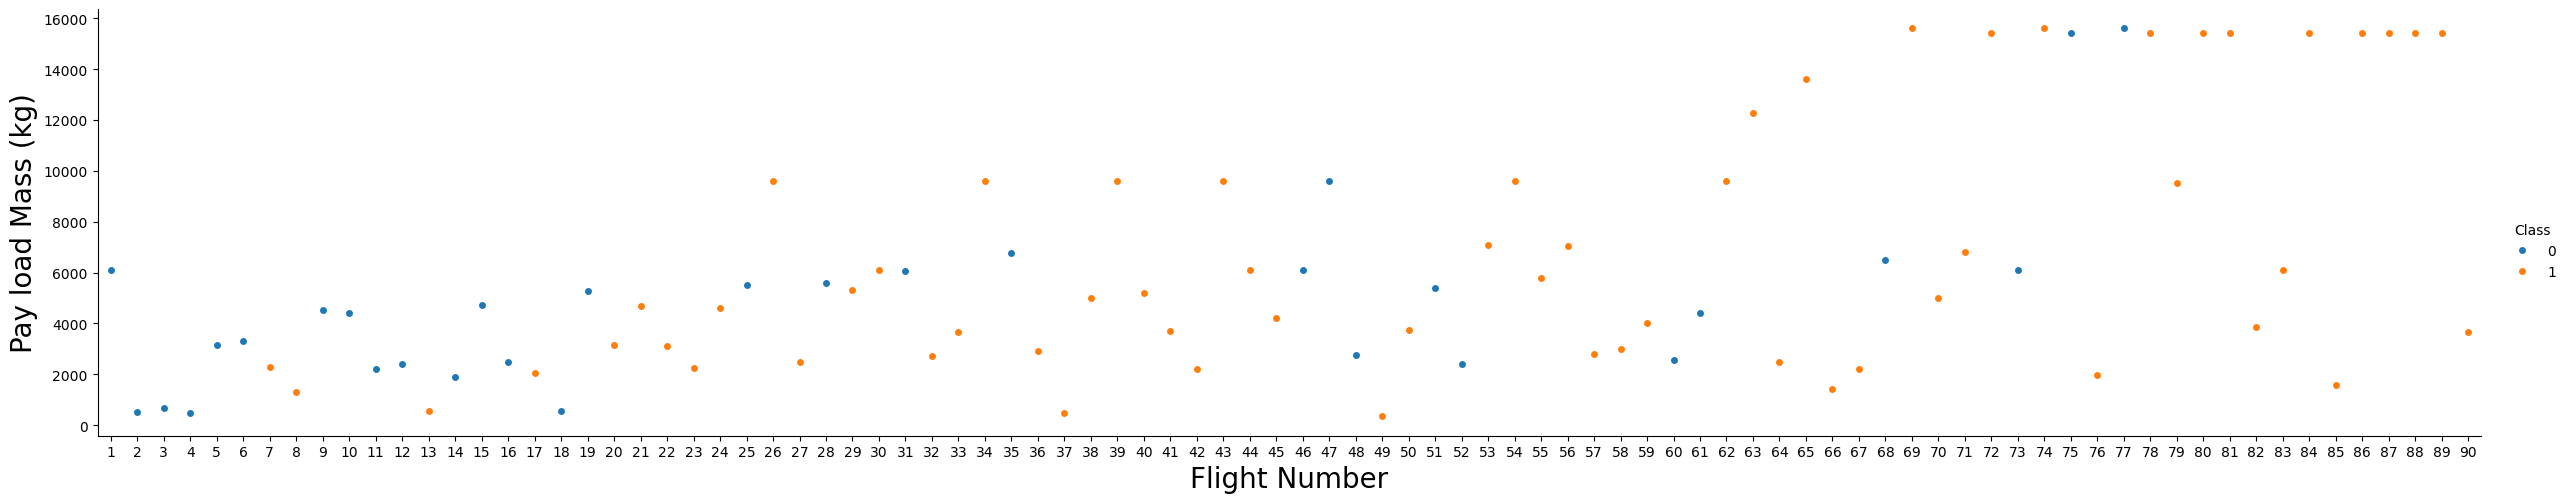

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

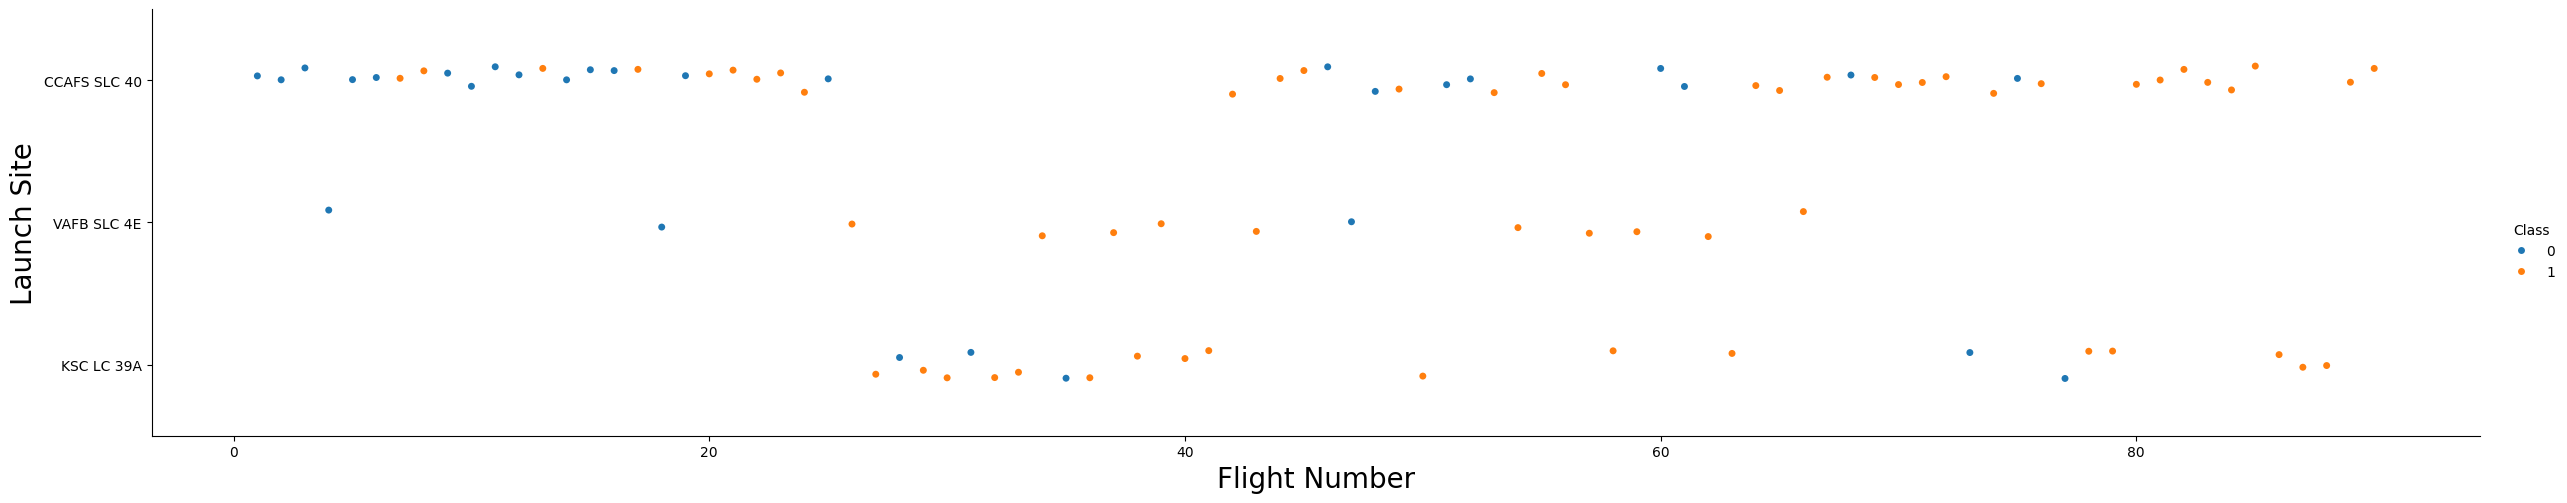

In [7]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()


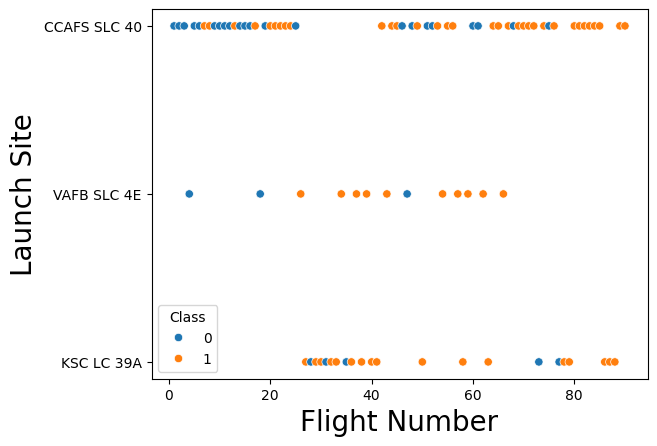

In [9]:

sns.scatterplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()


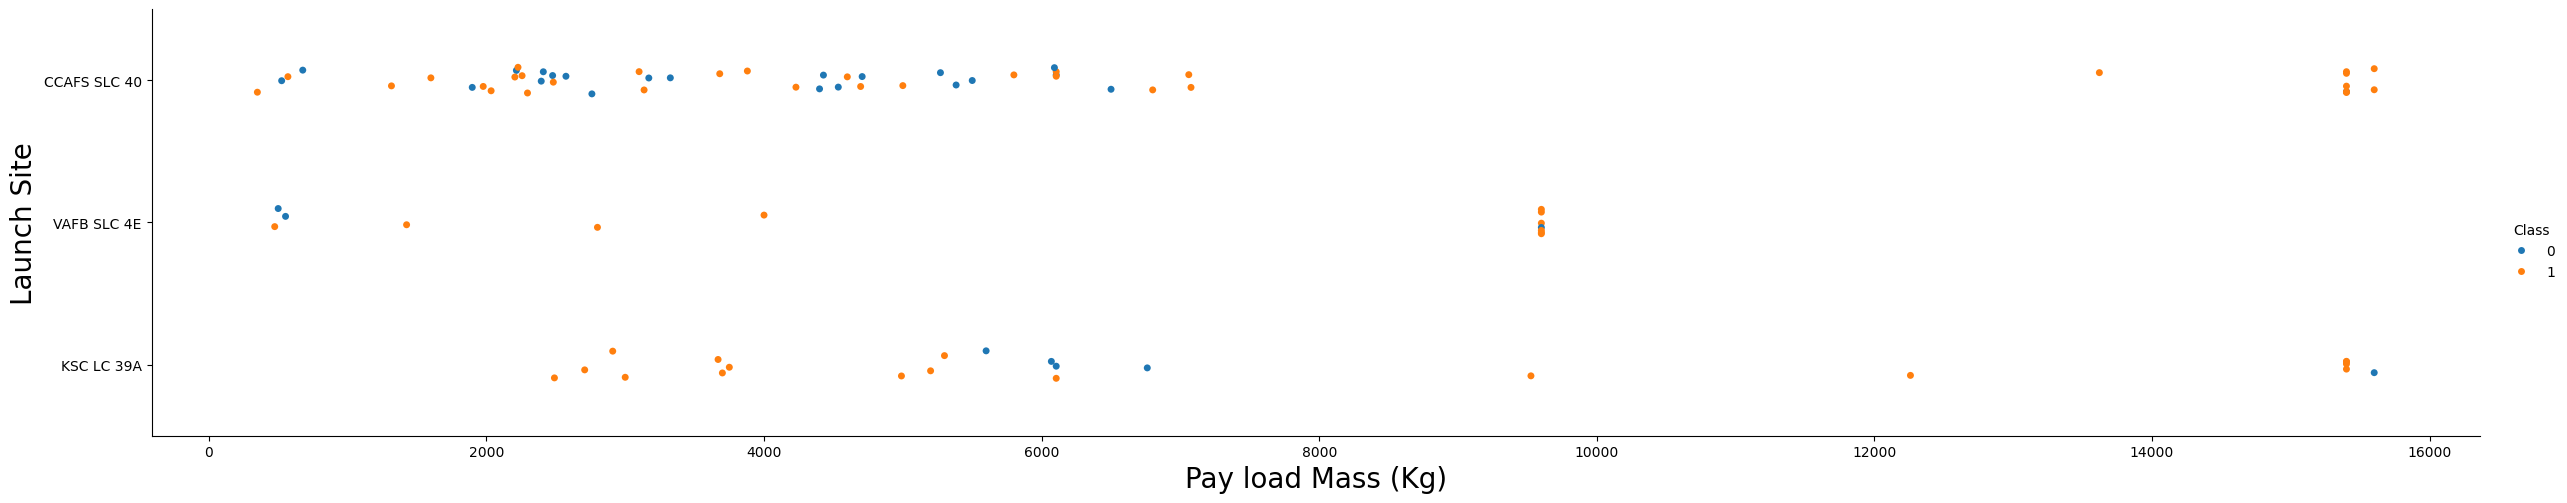

In [10]:
### TASK 2: Visualize the relationship between Payload and Launch Site
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay load Mass (Kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

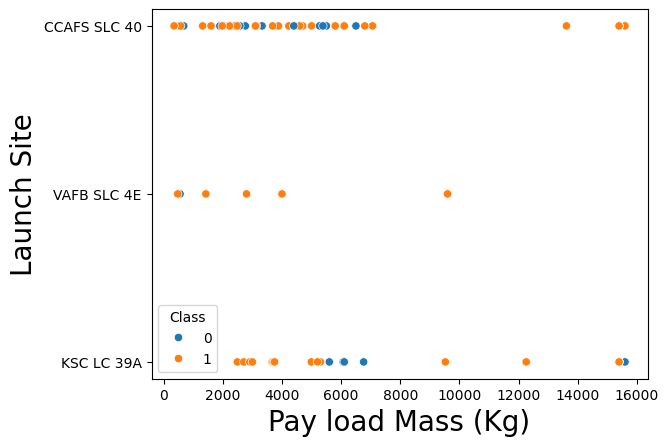

In [11]:
sns.scatterplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df)
plt.xlabel("Pay load Mass (Kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

In [13]:
df[['Orbit','Class']]

,Orbit,Class
0,LEO,0
1,LEO,0
2,ISS,0
3,PO,0
4,GTO,0
...,...,...
85,VLEO,1
86,VLEO,1
87,VLEO,1
88,VLEO,1


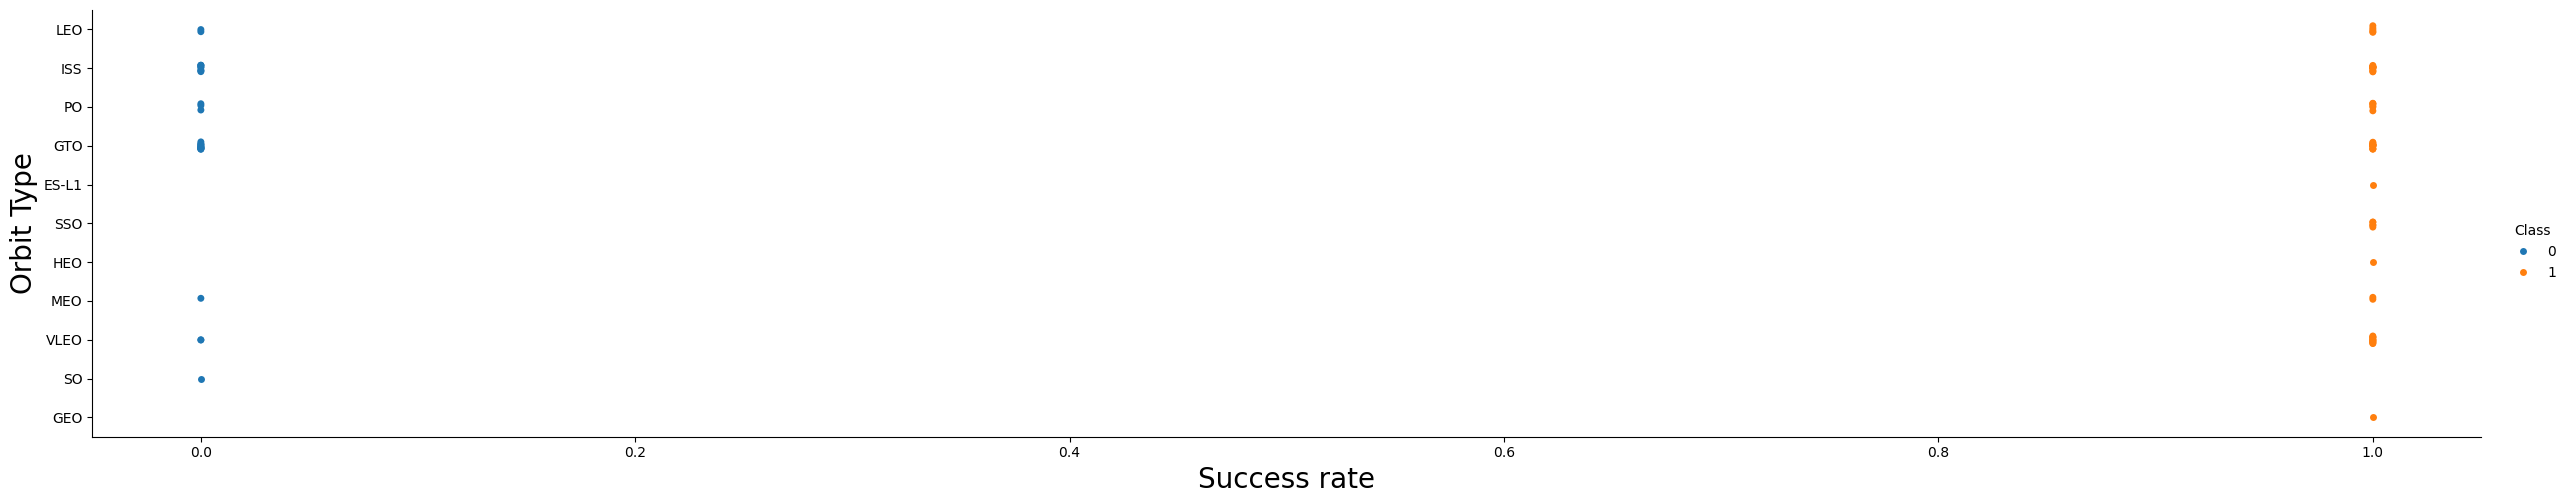

In [14]:
### TASK  3: Visualize the relationship between success rate of each orbit type
sns.catplot(y="Orbit", x="Class", hue="Class", data=df, aspect = 5)
plt.xlabel("Success rate",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

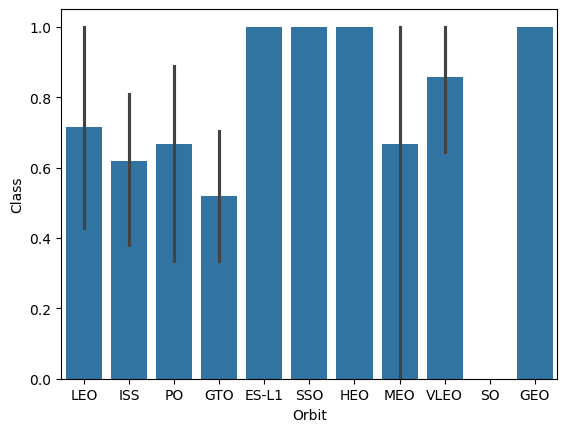

In [28]:
# HINT use groupby method on Orbit column and get the mean of Class column
df_new = df
#df_new['Orbit'] = df['Orbit'].groupby
#df_new['Class'] = df['Class'].mean()
sns.barplot(df, x="Orbit", y="Class")
plt.show()

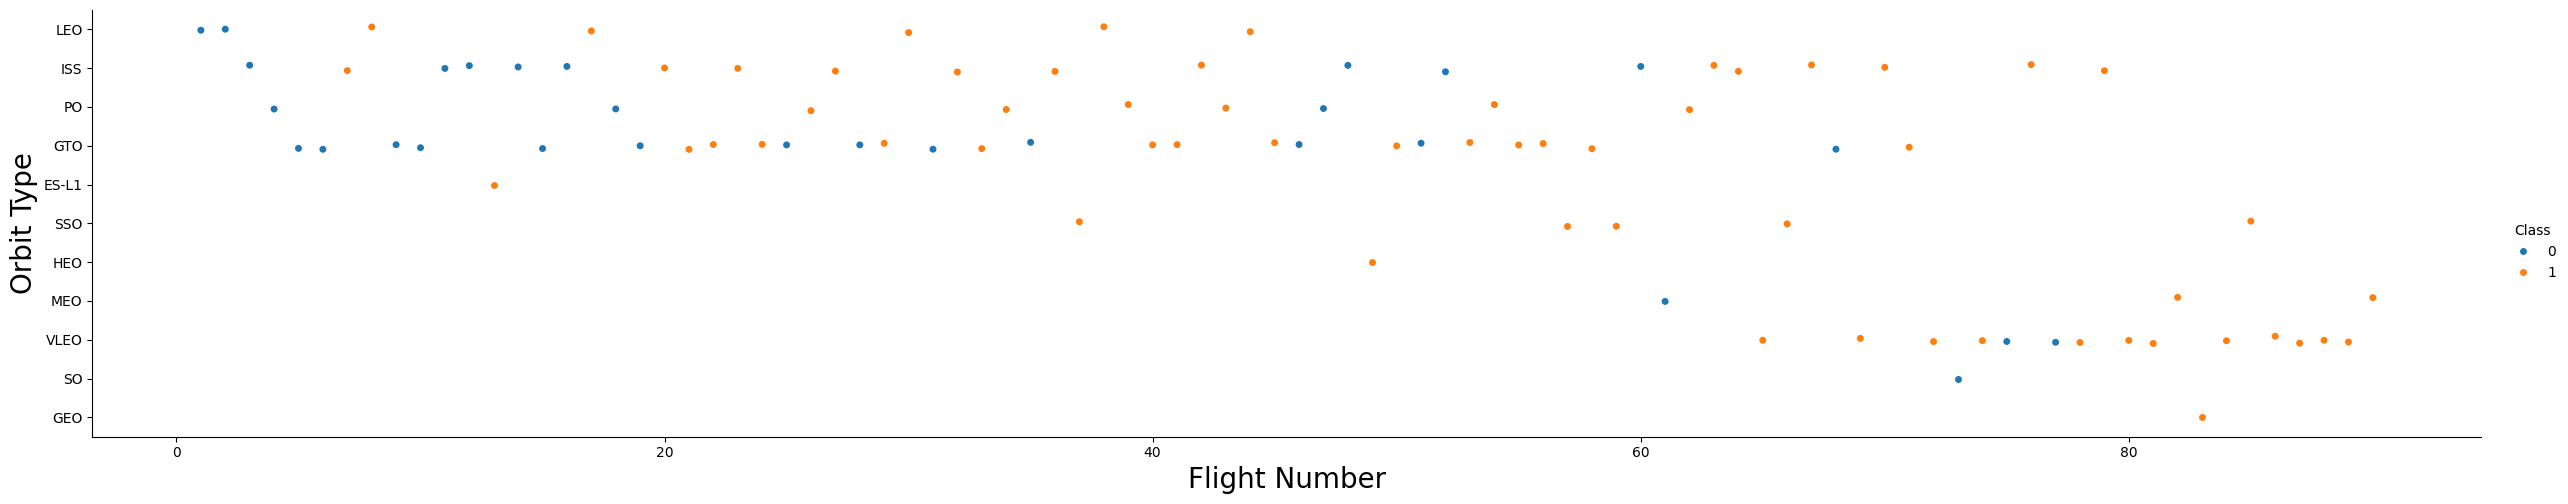

In [29]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()


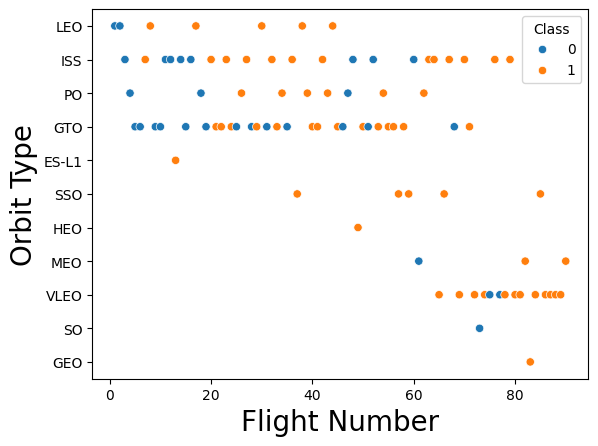

In [30]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

sns.scatterplot(y="Orbit", x="FlightNumber", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()


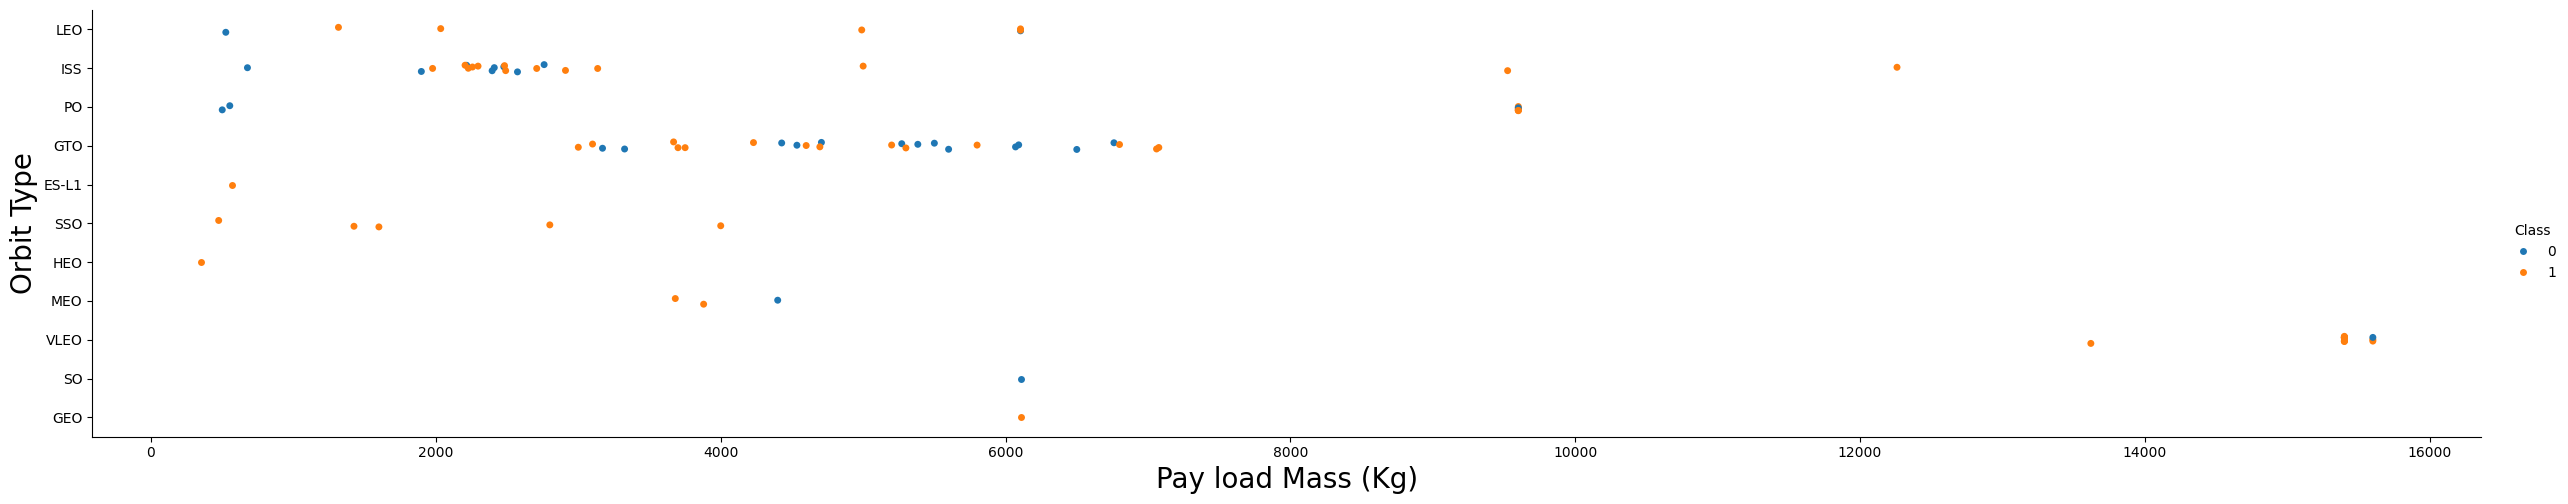

In [31]:
### TASK  5: Visualize the relationship between Payload and Orbit type
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay load Mass (Kg)",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()


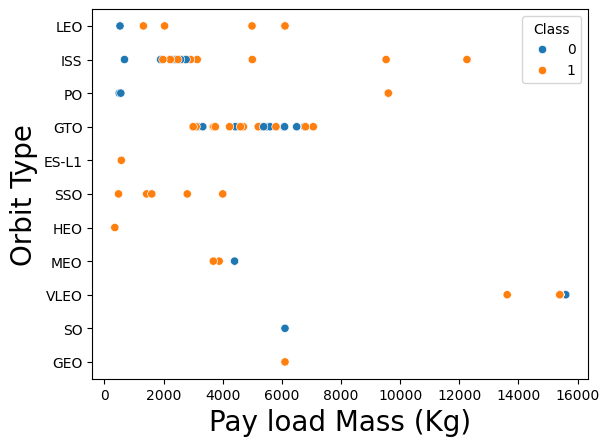

In [32]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(y="Orbit", x="PayloadMass", hue="Class", data=df)
plt.xlabel("Pay load Mass (Kg)",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

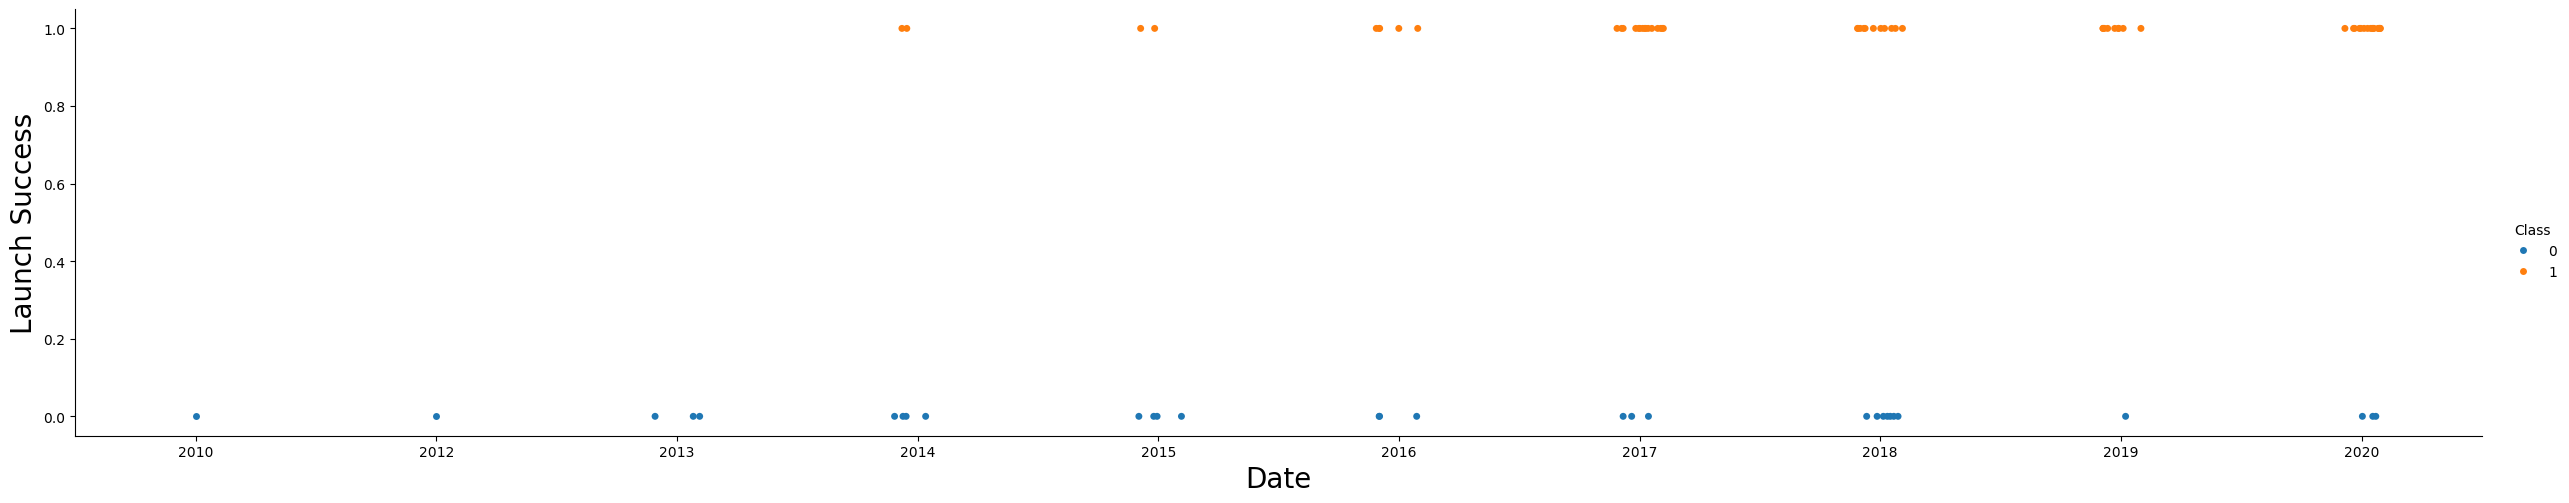

In [35]:
### TASK  6: Visualize the launch success yearly trend
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    
sns.catplot(y="Class", x="Date", hue="Class", data=df, aspect = 5)
plt.xlabel("Date",fontsize=20)
plt.ylabel("Launch Success",fontsize=20)
plt.show()


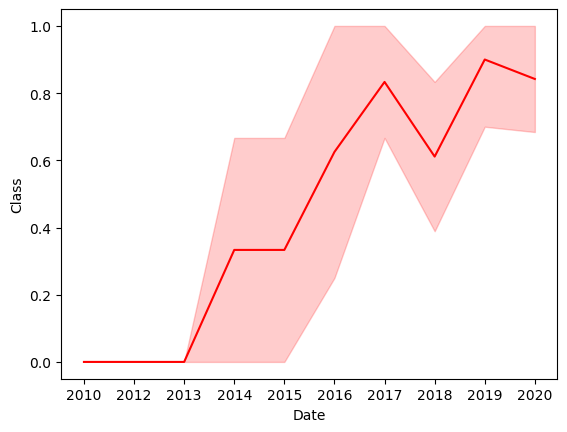

In [37]:
sns.lineplot(df, x="Date", y="Class", color='red')
plt.show()

In [38]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [44]:
### TASK  7: Create dummy variables to categorical columns

features_one_hot = pd.get_dummies(features[['Orbit', 'LaunchSite','LandingPad','Serial']])
#OneHotEncoder Pending
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
### TASK  8: Cast all numeric columns to `float64`
features_one_hot = features_one_hot.astype('float64')

In [46]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)